mean:  117363.57142857143
variance:  7910311327.6734705
mean1:  116935.0
variance1:  134553572.57142857
mean2:  117792.14285714286
variance2:  15685701735.836735


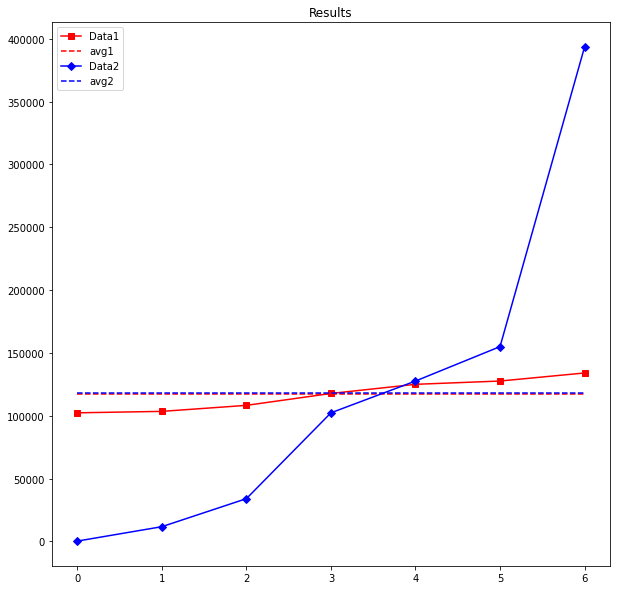

In [70]:
import numpy as np
import matplotlib.pyplot as plt
Data1 = [134045, 102343, 108279, 127634, 117738, 125018, 103488]
Data2 = [34045, 102343, 279, 127634, 11738, 155018, 393488]
Both = Data1+Data2
Both.sort()
Data1.sort()
Data2.sort()

# mean = np.mean(Both)
# variance = np.var(Both)
mean1 = np.mean(Data1)
variance1 = np.var(Data1)
# avg = sum(Data1) / len(Data1)
mean2 = np.mean(Data2)
variance2 = np.var(Data2)
print('mean: ',mean)
print('variance: ',variance)
print('mean1: ',mean1)
print('variance1: ',variance1)
print('mean2: ',mean2)
print('variance2: ',variance2)

plt.figure(figsize=(10,10))
# plt.plot(Data1+Data2,color='purple',marker='o', label='both sets')
plt.plot(Data1, color='red', marker='s', label='Data1')
plt.plot([mean1]*len(Data1), color='red', linestyle='--', label='avg1')
plt.plot(Data2, color='blue', marker='D', label='Data2')
plt.plot([mean2]*len(Data2), color='blue', linestyle='--', label='avg2')
plt.title('Results')

plt.legend()
plt.show()



[ 0.     2.375  4.5    6.375  8.     9.375 10.5   11.375 12.    12.375
 12.5   12.375 12.    11.375 10.5    9.375  8.     6.375  4.5    2.375]
max y:  12.5
max x:  2.5


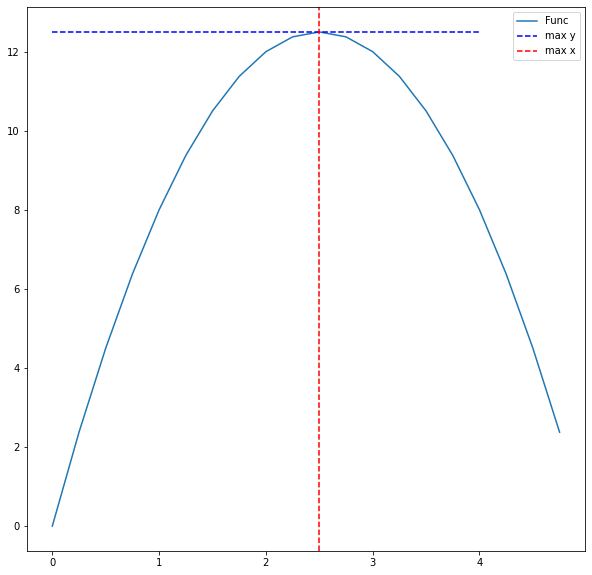

In [100]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,5,0.25)
y = -2*x**2+10*x
maxy = y.max()
maxx = x[y.argmax()]
print(y)
print('max y: ', maxy)
print('max x: ', maxx)
plt.figure(figsize=(10,10))
plt.plot(x,y, label='Func')
plt.plot([maxy]*5, color='blue', linestyle='--', label='max y')
plt.axvline(maxx,0,maxy, color='red', linestyle='--', label='max x')
plt.legend()
plt.show()

In [99]:
import numpy as np
import matplotlib.pyplot as plt

Customer1= np.array([3.0,1.0])
Customer2= np.array([3.4,1.2]) 
Customer3= np.array([3.1,1.1]) 
Customer4= np.array([1.4,0.6])
Customer5= np.array([1.2,0.4])
Customer6= np.array([1.1,0.3])

Customers = np.array([Customer1,Customer2,Customer3,Customer4,Customer5,Customer6])
Centroids = np.array([Customer1,Customer6])
N=len(Customers)

Custx = []
Custy = []
Measures = []

def euclidean(Customers, Centroids):
    distances = []
    for i in range(0,len(Centroids)):
        dist=np.sqrt(sum(pow(np.subtract(Customers,Centroids[i]),2)))
        distances.append(dist)
    return distances

def Draw_Status(Customers, Centroids, clusters, plotnumber):
    plt.plot.subplot()


for x in Customers:
    custx.append(x[0])
    custy.append(x[1])
    # measures.append(x)

# measures = euclidean(Customers,Centroids)
print('N:',N)
print('Cs:',len(Centroids))
print('Centroids:',Centroids)
print('Distances:',euclidean(Customers,Centroids))
print('Customers:',Customers[:][:][0])
print()
test = euclidean(Customers,Centroids)

plt.scatter(custx,custy)
plt.scatter([Centroids[:][0]],[Centroids[:][1]], marker='s', label='Centroids')


plt.legend()
plt.show()

N: 6
Cs: 2
Centroids: [[3.  1. ]
 [1.1 0.3]]
Distances: [array([3.09515751, 1.02956301]), array([3.60555128, 1.42828569])]
Customers: [3. 1.]

/usr/local/lib/python3.9/site-packages/numpy/ma/core.py:2831: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: x and y must be the same size